In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pandas.api.types import is_numeric_dtype
import re

In [2]:
df = pd.read_csv("./Heart_failure_clinical_records_dataset.csv")

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
# Get the number of rows and columns
print(df.shape)
# get the column names
print(df.columns)

(299, 13)
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [5]:
for i in df.columns:
    if is_numeric_dtype(df[i]) == False:
        list_char = []
        for j in range(len(df)):
            if type(df[i][j]) == str:
                list_char.extend(re.findall("[^A-Za-z0-9]", df[i][j]))
        print(i, list(dict.fromkeys(list_char)))

In [6]:
df.info()
print("-" * 50)
print(pd.value_counts(df.dtypes))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
------------------

C:\Users\baokh\AppData\Local\Temp\ipykernel_17640\1220394291.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(df.dtypes))


In [7]:
# show duplicate rows
df[df.duplicated()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [8]:
# Dropping the duplicate Rows
print("Initial shape of the dataset : ", df.shape)
df = df.drop_duplicates(keep = 'first', ignore_index=True)
print ("Shape of the dataset after dropping the duplicate rows : ", df.shape)

Initial shape of the dataset :  (299, 13)
Shape of the dataset after dropping the duplicate rows :  (299, 13)


In [9]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column} -> {num_distinct_values} distinct values\n")

age -> 48 distinct values

anaemia -> 2 distinct values

creatinine_phosphokinase -> 208 distinct values

diabetes -> 2 distinct values

ejection_fraction -> 17 distinct values

high_blood_pressure -> 2 distinct values

platelets -> 176 distinct values

serum_creatinine -> 40 distinct values

serum_sodium -> 27 distinct values

sex -> 2 distinct values

smoking -> 2 distinct values

time -> 148 distinct values

DEATH_EVENT -> 2 distinct values



In [10]:
categorical_columns = df.select_dtypes(exclude="number").columns
numerical_columns = df.select_dtypes(include="number").columns

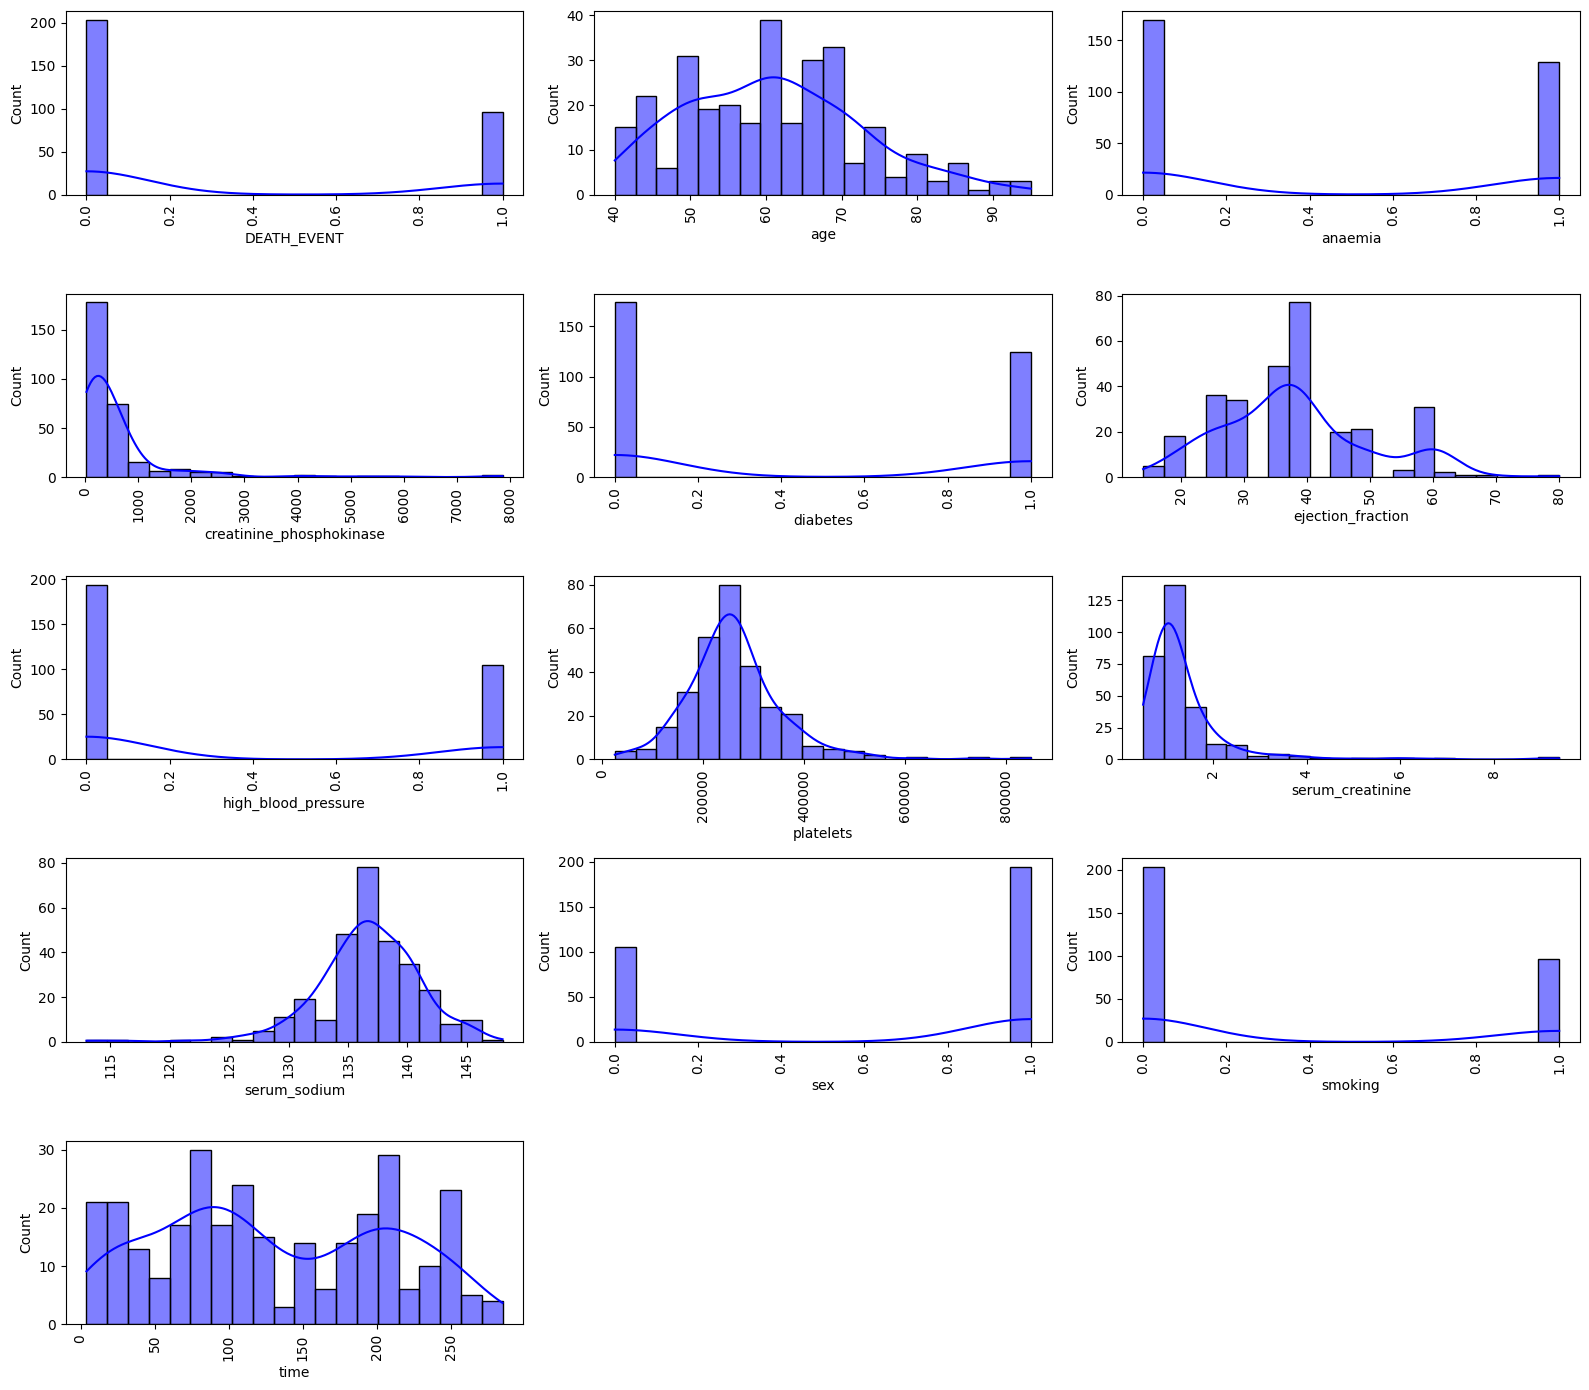

In [11]:
#figuresize = (16, 14)
cols = 3
rows = math.ceil(len(numerical_columns) / cols)

plt.figure(figsize=(16, 14)) # Kích thước hình vẽ
for i, column in enumerate(numerical_columns):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[numerical_columns[i-1]], color='blue', edgecolor='black', kde=True, bins=20)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

C:\Users\baokh\AppData\Local\Temp\ipykernel_17640\600017415.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(x="Score", y="Specs", data=featureScores, palette="winter")


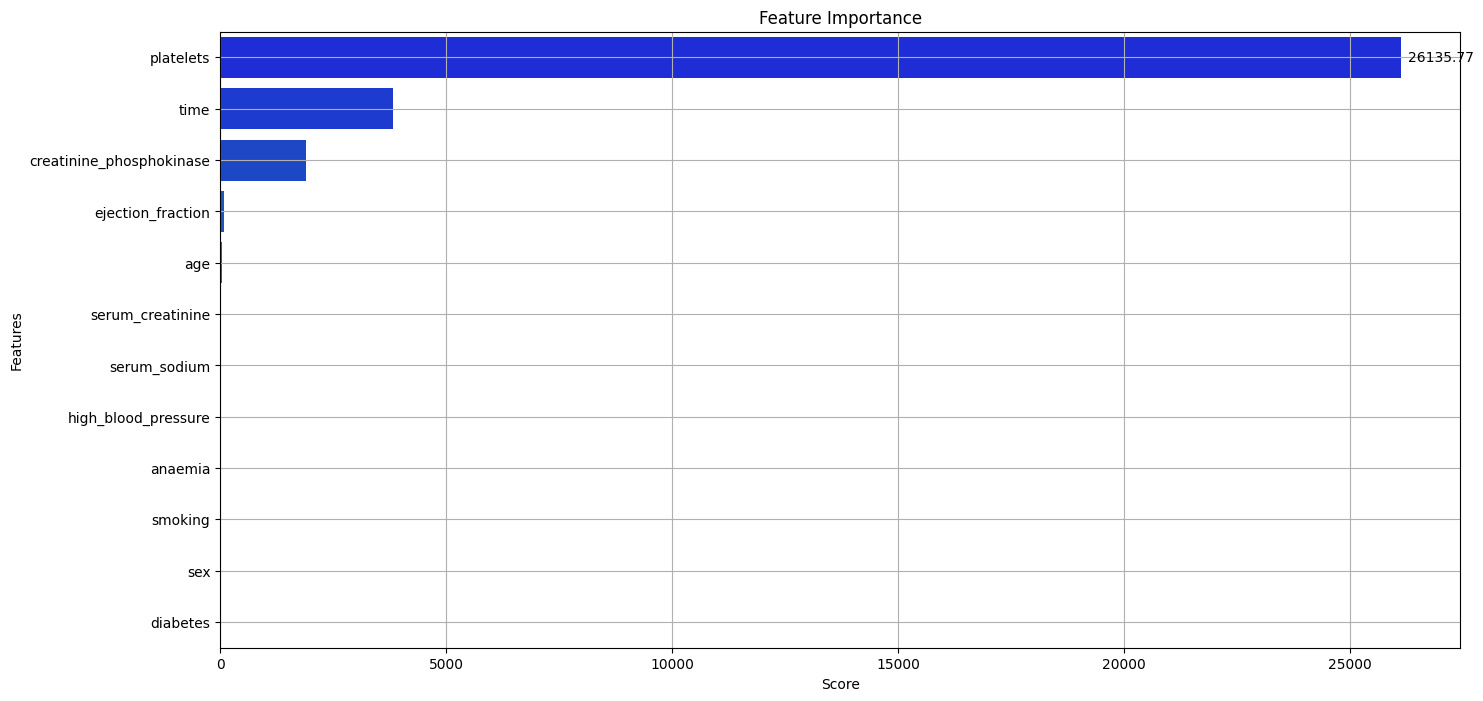

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = df.copy()
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k="all")
fit = bestfeatures.fit(x, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(fit.feature_names_in_)

# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ["Specs", "Score"]

# Plot the scores, sorted by the score
plt.figure(figsize=(16, 8))
featureScores.sort_values(by="Score", ascending=False, inplace=True)
fig = sns.barplot(x="Score", y="Specs", data=featureScores, palette="winter")
plt.title("Feature Importance")
plt.xlabel("Score")
plt.ylabel("Features")
plt.grid()

fig.bar_label(fig.containers[0], labels=dfscores.values.reshape(-1).sort(), fmt="%.2f", padding=5)
plt.show()

In [13]:
x = df.drop(["DEATH_EVENT"], axis=1)
y = df["DEATH_EVENT"]

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

In [15]:
print("Size training data:", x_train.shape)
print("Size testing data:", x_test.shape)


Size training data: (179, 12)
Size testing data: (120, 12)


In [16]:
# linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = lr.predict(x_test)

print("Training R2:", r2_score(y_train, lr.predict(x_train)))
print("Test R2:", r2_score(y_test, y_pred))



Training R2: 0.4352263278715415
Test R2: 0.34190691549800567


In [18]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(x_train,y_train)
y_pred_logis=logis.predict(x_test)
from sklearn.metrics import accuracy_score
accuraccuracy_logis=accuracy_score(y_test,y_pred_logis)
print("Accuracy: {:.2f}".format(accuraccuracy_logis))

Accuracy: 0.84


C:\Users\baokh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_logis)
cnf_matrix

array([[72,  5],
       [14, 29]], dtype=int64)

Text(0.5, 23.52222222222222, 'Dự báo')

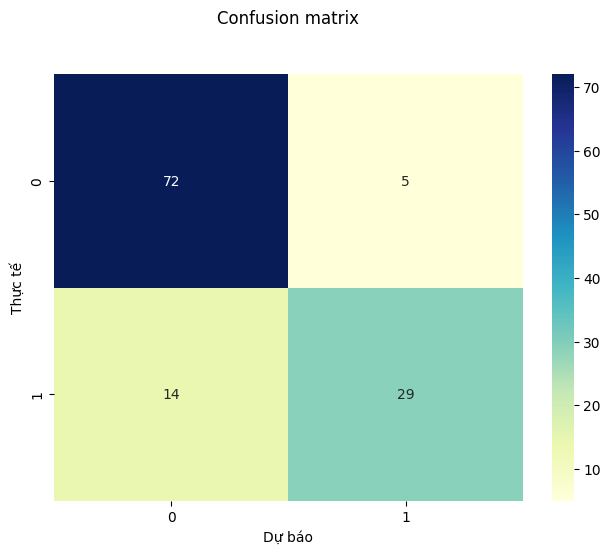

In [20]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logis))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88        77
           1       0.85      0.67      0.75        43

    accuracy                           0.84       120
   macro avg       0.85      0.80      0.82       120
weighted avg       0.84      0.84      0.84       120



In [23]:
x_train1, x_test1, y_train1, y_test1 =train_test_split(x,y,train_size=0.7, random_state = 42)

In [24]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C= 10, gamma=1)
model.fit(x_train1, y_train1)
y_pred1 = model.predict(x_test1)

In [25]:
print("Accuracy: {:.2f}".format(model.score(x_test1,y_test1)))

Accuracy: 0.78


In [26]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test1, y_pred1)
cnf_matrix

array([[49,  4],
       [16, 21]], dtype=int64)

Text(0.5, 23.52222222222222, 'Dự báo')

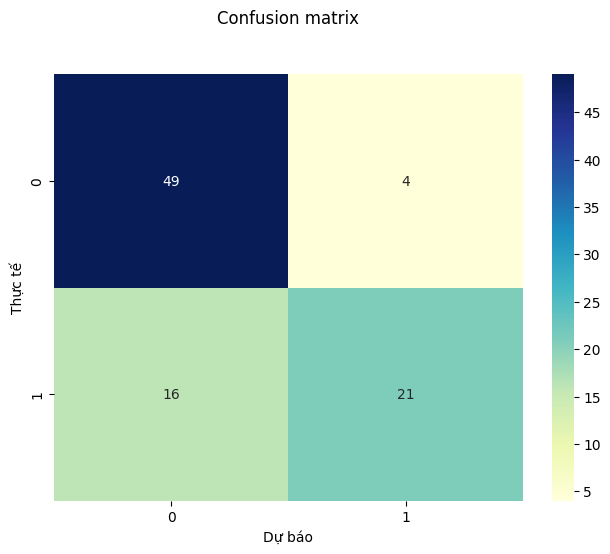

In [27]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        53
           1       0.84      0.57      0.68        37

    accuracy                           0.78        90
   macro avg       0.80      0.75      0.75        90
weighted avg       0.79      0.78      0.77        90

